<a href="https://colab.research.google.com/github/itzelfym/PRONOSTICO-TIIE/blob/main/Copia_de_4_2_Aplicaciones_de_la_Simulaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tercer Parcial

Consideremos una empresa del sector de alimentos procesados de la ciudad de
Pereira, Colombia, que requiere ampliar sus ventas a través  de dos puntos de
venta uno a ubicar en Armenia y otro en Manizales, para un total de 5 puntos
incluyendo los que tiene actualmente.

La especialidad de la empresa es la producción de galletería fina y de pan debonos con marca propia y reconocida a nivel local. Se considera un horizonte
de tiempo de cinco años para el proyecto.

El **EBITDA** es el acrónimo de **Earnings** **Before** **Interest**, **Taxes**, **Depreciation**, **Amortization**. Es una métrica financiera que nos muestra que tanto
dinero una empresa genera antes de impuestos y depreciaciones. El EBITDA es
importante para un negocio porque nos da una idea que tanto dinero genera de
sus operaciones. Esto es relevante para los inversores y prestamistas que quieren
saber la rentabilidad.

La fórmula del EBITDA es
$$EBITDA = Ventas − Gastos y Costos$$

La gerencia de la Empresa realizó un estudio de mercado y de costos para
ampliar su partirealizón con dos nuevos puntos de venta. Se tienen el estado
de resultado de los próximos 5 años.

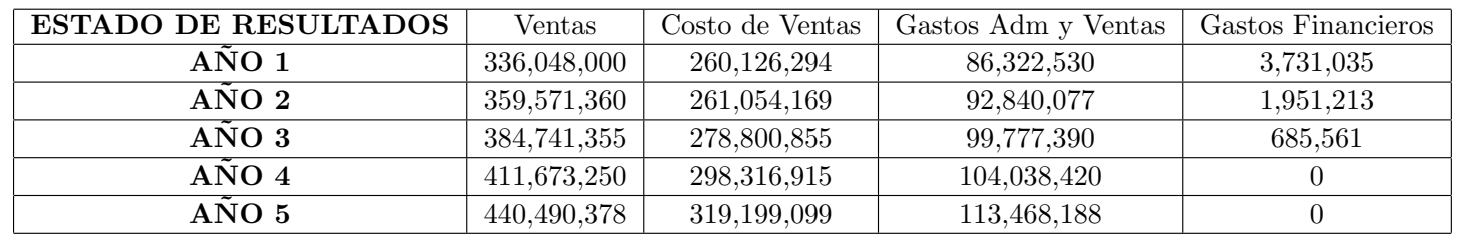

Considerando los siguientes periodos.


*   Año 1 - 2
*   Año 2 - 3
*   Año 3 - 4
*   Año 4 - 5


¿Cuál  es el periodo con mayor probabilidad de tener un EBITDA mayor a 0 y
cuál es el periodo con menor probabilidad de tener un EBITDA mayor a 0?

## Simulación

In [ ]:
import pandas as pd
df = pd.read_excel('datos.xlsx')
df.head()

,ESTADO DE RESULTADOS,Ventas,Costo de ventas,Gastos Adm y ventas,Gastos financieros
0,AÑO 1,336048000,260126294,86322530,3731035
1,AÑO 2,359571360,261054169,92840077,1951213
2,AÑO 3,384741355,278800855,99777390,685561
3,AÑO 4,411673250,298316915,104038420,0
4,AÑO 5,440490378,319199099,113468188,0


In [ ]:
df['EBITDA']=df['Ventas']-df['Costo de ventas']-df['Gastos Adm y ventas']-df['Gastos financieros ']
df.head()

,ESTADO DE RESULTADOS,Ventas,Costo de ventas,Gastos Adm y ventas,Gastos financieros,EBITDA,EBITDA
0,AÑO 1,336048000,260126294,86322530,3731035,-14131859,-14131859
1,AÑO 2,359571360,261054169,92840077,1951213,3725901,3725901
2,AÑO 3,384741355,278800855,99777390,685561,5477549,5477549
3,AÑO 4,411673250,298316915,104038420,0,9317915,9317915
4,AÑO 5,440490378,319199099,113468188,0,7823091,7823091


In [ ]:
import pandas as pd
from random import randint, uniform

# Generamos 10,000 simulaciones

df = pd.DataFrame({'Inversion Inicial': [randint(190_000,210_000) for _ in range (10_000)],
                          'Flujo de Efectivo Año 1': [randint(55_000,60_000) for _ in range (10_000)],
                                                    'Flujo de Efectivo Año 2': [randint(65_000,70_000) for _ in range (10_000)],
                                                                              'Flujo de Efectivo Año 3': [randint(85_000,90_000) for _ in range (10_000)],
                                                                                                        'Flujo de Efectivo Año 4': [randint(93_000,95_000) for _ in range (10_000)],
                                                                                                                                  'Flujo de Efectivo Año 5': [randint(98_000,102_000) for _ in range (10_000)],
                                                                                                                                                            'Costo de Capital': [uniform(0.18,0.25) for _ in range (10_000)]})

                                                                                                                                                            caso_2_df.head()

In [ ]:
df.describe().loc[:,'EBITDA'].to_frame().loc[['mean','min','max']]

,EBITDA
mean,2442519.4
min,-14131859.0
max,9317915.0


In [ ]:
positivos, negativos = 0, 0
for _ in df['EBITDA'] :
    if _ > 0 :
      positivos += 1
    elif _ < 0 :
      negativos += 1

print('Numero de EBITDA mayores a 0 : {0:d}, probabilidad {1:.2f}\nNumero de EBITDA  menores a 0 : {2:d}, probabilidad {3:.2f}\n'.format( positivos, positivos/(positivos+negativos), negativos, negativos/(positivos+negativos) ))

Numero de EBITDA mayores a 0 : 4, probabilidad 0.80
Numero de EBITDA  menores a 0 : 1, probabilidad 0.20

